# Övningsuppgifter 1
*av Anders Sundell*

Scatterplots, eller spridningsdiagram som de egentligen heter på svenska, är en av de vanligaste graftyperna för att visa samband mellan två variabler. Anledningen är att de visar mycket information på samma gång: korrelationen, spridningen, olika outliers, och faktiskt varje enskild datapunkts värden, även om det kan vara svårt att se exakt.

En snygg scatterplot är ofta mer intuitivt övertygande än en sofistiskerad men mer svårgenomtränglig regressionsanalys, även om regressionsanalysen kan ta hänsyn till fler faktorer. I en bra rapport använder man sig med fördel av både och. I den här guiden ska vi gå igenom hur man gör scatterplots i Stata, och hur man kan ställa in dem för att få dem informativa och snygga.

För att ha något att jobba med kommer vi i det här exemplet att använda oss av <a href="https://qog.pol.gu.se/data/datadownloads/qogbasicdata" target=_blank>QoG basic-datamängden</a>. Här har jag skrivit in sökvägen till datamängden direkt på internet, men man kan givetvis ladda ned den till sin dator och öppna den därifrån istället - det är vanligtvis att rekommendera.

In [1]:
use "https://www.qogdata.pol.gu.se/data/qog_bas_cs_jan18.dta", clear

(Quality of Government Basic dataset 2018 - Cross-Section)


## En enkel scatterplot 

I det här exemplet ska vi titta närmare på sambandet mellan ett lands grad av demokrati och dess korruptionsnivå.

I flera andra exempel har vi använt oss av Freedom Houses demokratiranking. Den har dock bara tre värden, och scatterplots lämpar sig bäst när variabeln har många olika värden. Därför kommer vi här att använda Politys demokratimått, __p_polity2__. Det går från -10 (maximal diktatur) till +10 (maximal demokrati). Korruptionsmåttet vi använder kommer från Transparency International, och heter i datamängden __ti_cpi__.

Scatterploten är en av många möjliga grafer som ligger under huvudkommandot __twoway__. Man börjar med twoway-kommandot, och lägger sedan till grafer inom parenteser. Flera grafer kan lagras på varandra för att skapa mer avancerade upplägg.

I parenteserna skriver man först __scatter__ och sedan y-variabeln, följt av x-variabeln. Det vanliga är att man sätter den oberoende variabeln på x-axeln.


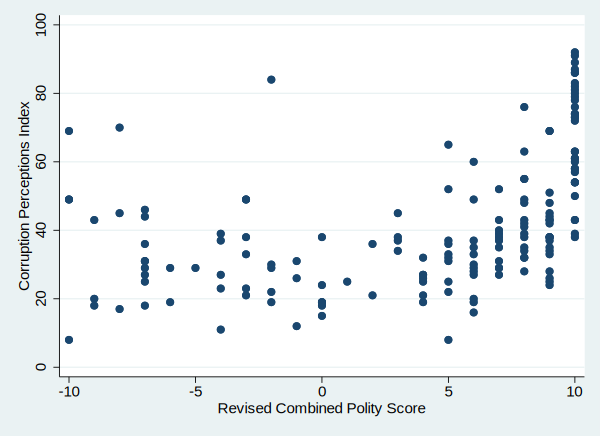

In [2]:
twoway (scatter ti_cpi p_polity2)

## Lägga till regressionslinje

Om man vill förtydliga sambandet - vilket kan vara bra ur pedagogisk synvinkeln men dåligt om man drar fokus till svaga samband - kan man lägga till en regressionslinje. Rent tekniskt gör vi det genom att lägga till ett nytt lager, där regressionslinjen ligger. Lägger vi den efter scatterploten hamnar regressionslinjen ovanpå punkterna, annars under. Kommandot för regressionslinjen är __lfit__, följt av y-variabeln och sedan x-variabeln.

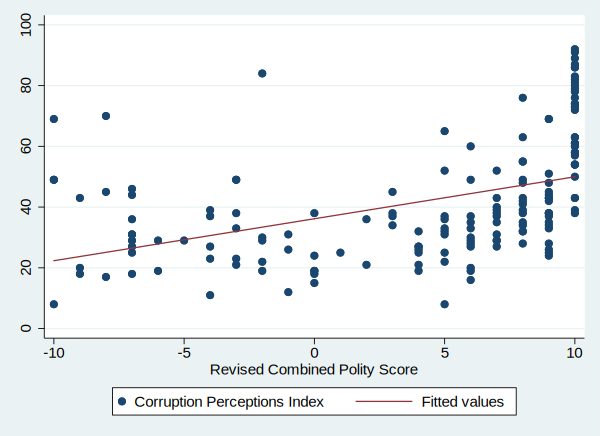

In [3]:
twoway (scatter ti_cpi p_polity2) (lfit ti_cpi p_polity2)

När man lägger till fler än ett lager dyker det automatiskt upp en förklaring under grafen. Den kan man om man vill ta bort genom att efter alla parenteser lägga till ett option för hela twoway-kommandot, __legend(off)__. När man lägger till fler lager kan förklaringen bli ganska otymplig, och det är då ofta bättre att förklara vad det är grafen visar i en textkommentar i sin rapport.

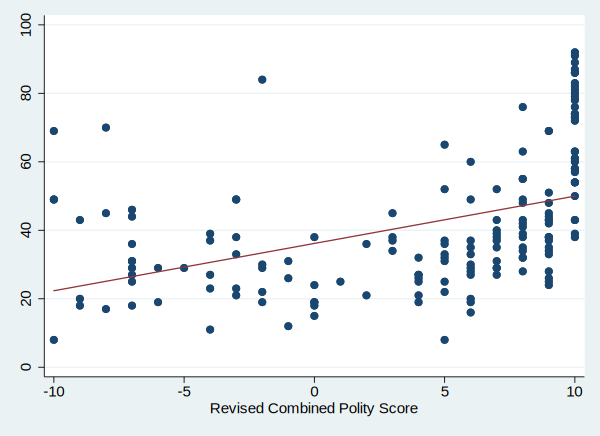

In [4]:
twoway (scatter ti_cpi p_polity2) (lfit ti_cpi p_polity2), legend(off)

## Lägga till etiketter

Något av det roligaste med scatterplots är att visa vilka analysenheter det faktiskt är som utgör prickarna i diagrammet. Det funkar inte när det är tusentals enheter, eller anonyma respondenter. Men när det är ett mindre antal välkända enheter, så som länder, stater eller kommuner är det ofta effektivt.

Det gör man genom att lägga till ett option, inne i scatter-parentesen. Varje lager i grafen kan ha sina egna options, och så har grafen som helhet sina options.

Option vi ska använda är __mlabel()__, där vi får ange den variabel som ska utgöra punkternas etikett. Vi kommer använda variabeln __cname__, landets namn.

Dessutom kommer vi lägga till option __mlabsize(vsmall)__, vilket gör etiketterna mindre, så att de ska gå att läsa.

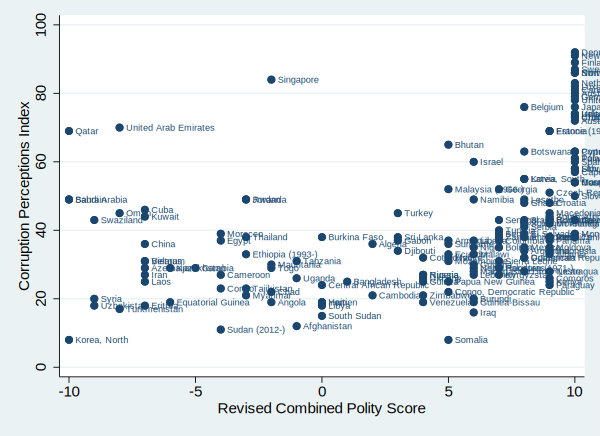

In [6]:
twoway (scatter ti_cpi p_polity2, mlabel(cname) mlabsize(vsmall))

Alla som tittade på tidigare versioner av grafen skulle frågat sig vilken pricken i mitten som låg så högt över alla andra var - nu ser man lätt att det är Singapore, ett i många avseenden väldigt speciellt land.

## Markera speciellt utvalda länder

Dock blir det väldigt gyttrigt ute till höger, där det är för många länder för att man ska kunna läsa. För att lösa det problemet rekommenderar jag att man gör en specialvariabel som har 1 på de utvalda länder vars namn man vill visa.

För detta använder vi gen-kommandot, tillsammans med en if-sats. If-satsen använder sig av eller-tecknet |, vilket betyder att hela satsen är uppfylld om något av villkoren är uppfyllda. Dvs om landet är något av de fem som räknas upp.

Det är också med en radbrytning /// som behövs för att Stata ska förstå att kommandot fortsätter på nästa rad.

In [11]:
gen select = 1 if cname=="Singapore" | cname=="Qatar" | cname=="Denmark" ///
| cname =="Korea, North" | cname=="Somalia"

(189 missing values generated)


Vi lägger nu till en scatterplot i ett lager till den tidigare grafen, och visar bara landetiketterna för det här lagret. Vi måste då också använda oss av en if-sats i scatterploten.

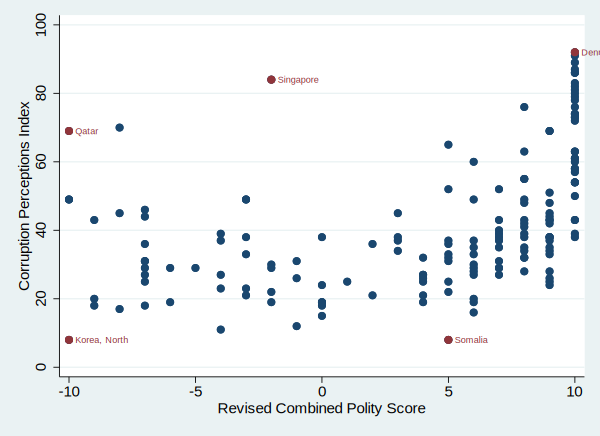

In [13]:
twoway  (scatter ti_cpi p_polity2) ///
        (scatter ti_cpi p_polity2 if select==1, mlabel(cname) mlabsize(vsmall)) ///
        , legend(off)

Det vi ser nu är alltså två scatterplots ovanpå varandra. I det nedre lagret är punkterna blå, och det är inga etiketter. Det övre lagret visar egentligen exakt samma sak, men bara punkterna som uppfyller villkoret att variabeln select ska ha värdet 1 visas. Det är också bara för detta lager som etiketterna visas.

Att bara visa några etiketter kan göra att det blir överskådligt samtidigt som man i kringliggande text kan diskutera särskilt intressanta fall.

## Avslutning

Scatterplots är ett välanvänt och effektivt sätt att illustrera samband och visa mycket information på samma gång. Men de passar inte alltid. Har man till exempel enkätdata, med några få avgränsade värden på variablerna, kommer grafen se väldigt konstig ut. Då är det antagligen bättre med någon typ av skaldiagram.

Om det är till en uppsats, experimentera mycket med grafens upplägg och utseende för att göra den så pedagogisk och tilltalande som möjligt. Läsaren ska inte behöva anstränga sig för att förstå det du försöker säga.